In [1]:
import numpy as np
import pandas as pd
from tqdm import  tqdm
import pickle
import cobra
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
### input 
unikp_km_predict_path = '../../Results/kcat_km_predict/yeast8U_unikp.csv'
unikp_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_unikp.csv'
km_km_predict_path = '../../Results/kcat_km_predict/yeast8U_km_km_predict.csv'
dlkcat_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_kcat_predict.csv'
turnup_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_kcat_result_TurNuP.csv'


### output
dlkcat_kcat_predict_S1_figure = '../../Results/Figures/figs10-a1.pdf'#pdf
dlkcat_kcat_predict_S2_figure = '../../Results/Figures/figs10-a2.pdf'#pdf

unikp_kcat_predict_S1_figure = '../../Results/Figures/figs10-b1.pdf'#pdf
unikp_kcat_predict_S2_figure = '../../Results/Figures/figs10-b2.pdf'#pdf

turnup_kcat_predict_S1_figure = '../../Results/Figures/figs10-c1.pdf'#pdf
turnup_kcat_predict_S2_figure = '../../Results/Figures/figs10-c2.pdf'#pdf

km_km_predict_S1_figure = '../../Results/Figures/figs10-d1.pdf'#pdf
km_km_predict_S2_figure = '../../Results/Figures/figs10-d2.pdf'#pdf

unikp_km_predict_S1_figure = '../../Results/Figures/figs10-e1.pdf'#pdf
unikp_km_predict_S2_figure = '../../Results/Figures/figs10-e2.pdf'#pdf

# unikp_km

In [ ]:
km_pre_df = pd.read_csv(unikp_km_predict_path,index_col=None)
print(km_pre_df.shape)

set1 = set(km_pre_df[km_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
set2 = set(km_pre_df[~km_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
list1 =  [x for x in set1 if x not in set2]
list2 =  [x for x in set1 if x  in set2]
list3 =  [x for x in set2 if x not in set1]
km_pre_df1 = km_pre_df[km_pre_df['gene'].isin(list1)]
km_pre_df2 = km_pre_df[(km_pre_df['gene'].isin(list2))&(~km_pre_df['rea_id'].str.contains('rxn'))]
km_pre_df3 = km_pre_df[(km_pre_df['gene'].isin(list2))&(km_pre_df['rea_id'].str.contains('rxn'))]
km_pre_df4 = km_pre_df[km_pre_df['gene'].isin(list3)]
list1_without_rxn = km_pre_df1
list2_without_rxn = km_pre_df2
list3_with_rxn = km_pre_df3
list4_with_rxn = km_pre_df4

data_values_1 = np.sort(list1_without_rxn["km"])#median
data_len_1 = len(data_values_1)
data_proportions_1 = np.arange(1, data_len_1 + 1) / data_len_1
data_values_2 = np.sort(list2_without_rxn["km"])#median
data_len_2 = len(data_values_2)
data_proportions_2 = np.arange(1, data_len_2 + 1) / data_len_2
data_values_3 = np.sort(list3_with_rxn["km"])#median
data_len_3 = len(data_values_3)
data_proportions_3 = np.arange(1, data_len_3 + 1) / data_len_3
data_values_4 = np.sort(list4_with_rxn["km"])#median
data_len_4 = len(data_values_4)
data_proportions_4 = np.arange(1, data_len_4 + 1) / data_len_4
median_data_values_1 = np.median(data_values_1)
median_data_values_2 = np.median(data_values_2)
median_data_values_3 = np.median(data_values_3)
median_data_values_4 = np.median(data_values_4)

print("Median in data_values_1:", median_data_values_1)
print("Median in data_values_2:", median_data_values_2)
print("Median in data_values_3:", median_data_values_3)
print("Median in data_values_4:", median_data_values_4)


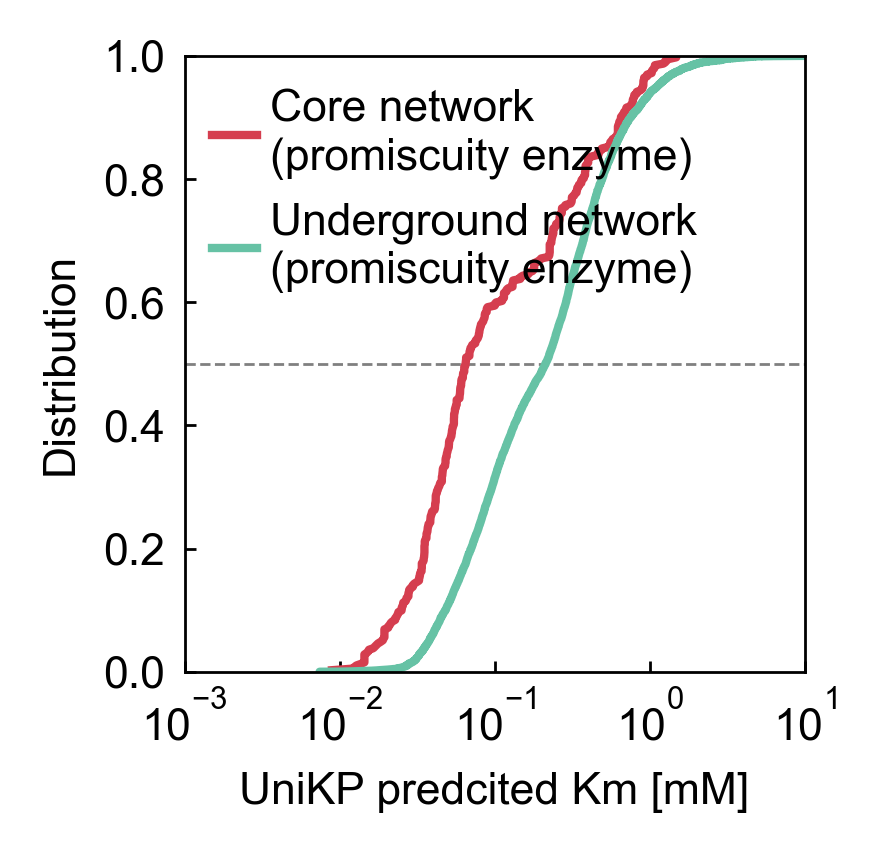

In [21]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
# plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
# plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')

# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)

plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('UniKP predcited Km [mM]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.001, 10)
plt.xscale('log')
plt.xticks([0.001, 0.01, 0.1, 1,10])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(unikp_km_predict_S1_figure, dpi=400, bbox_inches='tight')
plt.show()

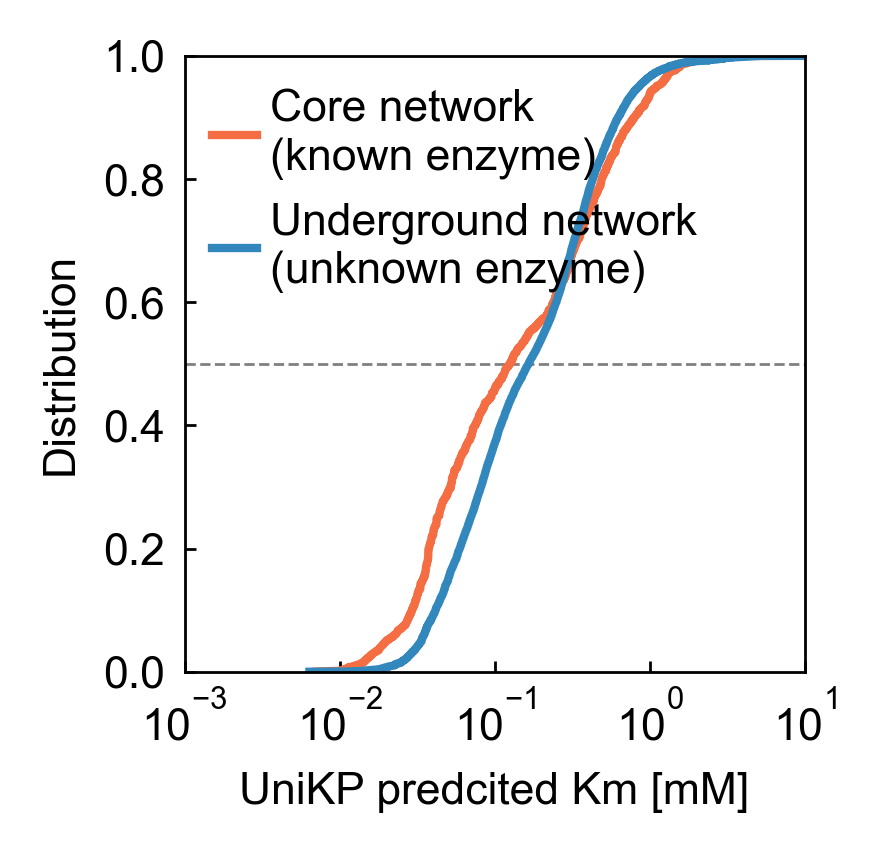

In [22]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
# plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
# plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')

# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)

plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('UniKP predcited Km [mM]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.001, 10)
plt.xscale('log')
plt.xticks([0.001, 0.01, 0.1, 1,10])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(unikp_km_predict_S2_figure, dpi=400, bbox_inches='tight')
plt.show()

# km_km_predict

In [23]:
km_pre_df = pd.read_csv(km_km_predict_path,index_col=None)
print(km_pre_df.shape)
km_pre_df.rename(columns={'KM':'km'},inplace=True)

set1 = set(km_pre_df[km_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
set2 = set(km_pre_df[~km_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
list1 =  [x for x in set1 if x not in set2]
list2 =  [x for x in set1 if x  in set2]
list3 =  [x for x in set2 if x not in set1]
km_pre_df1 = km_pre_df[km_pre_df['gene'].isin(list1)]
km_pre_df2 = km_pre_df[(km_pre_df['gene'].isin(list2))&(~km_pre_df['rea_id'].str.contains('rxn'))]
km_pre_df3 = km_pre_df[(km_pre_df['gene'].isin(list2))&(km_pre_df['rea_id'].str.contains('rxn'))]
km_pre_df4 = km_pre_df[km_pre_df['gene'].isin(list3)]
list1_without_rxn = km_pre_df1
list2_without_rxn = km_pre_df2
list3_with_rxn = km_pre_df3
list4_with_rxn = km_pre_df4

data_values_1 = np.sort(list1_without_rxn["km"])#median
data_len_1 = len(data_values_1)
data_proportions_1 = np.arange(1, data_len_1 + 1) / data_len_1
data_values_2 = np.sort(list2_without_rxn["km"])#median
data_len_2 = len(data_values_2)
data_proportions_2 = np.arange(1, data_len_2 + 1) / data_len_2
data_values_3 = np.sort(list3_with_rxn["km"])#median
data_len_3 = len(data_values_3)
data_proportions_3 = np.arange(1, data_len_3 + 1) / data_len_3
data_values_4 = np.sort(list4_with_rxn["km"])#median
data_len_4 = len(data_values_4)
data_proportions_4 = np.arange(1, data_len_4 + 1) / data_len_4
# 计算中位数
median_data_values_1 = np.median(data_values_1)
median_data_values_2 = np.median(data_values_2)
median_data_values_3 = np.median(data_values_3)
median_data_values_4 = np.median(data_values_4)

print("Median in data_values_1:", median_data_values_1)
print("Median in data_values_2:", median_data_values_2)
print("Median in data_values_3:", median_data_values_3)
print("Median in data_values_4:", median_data_values_4)

(214244, 10)
Median in data_values_1: 0.07442987
Median in data_values_2: 0.12486760499999999
Median in data_values_3: 0.3097959
Median in data_values_4: 0.24026666


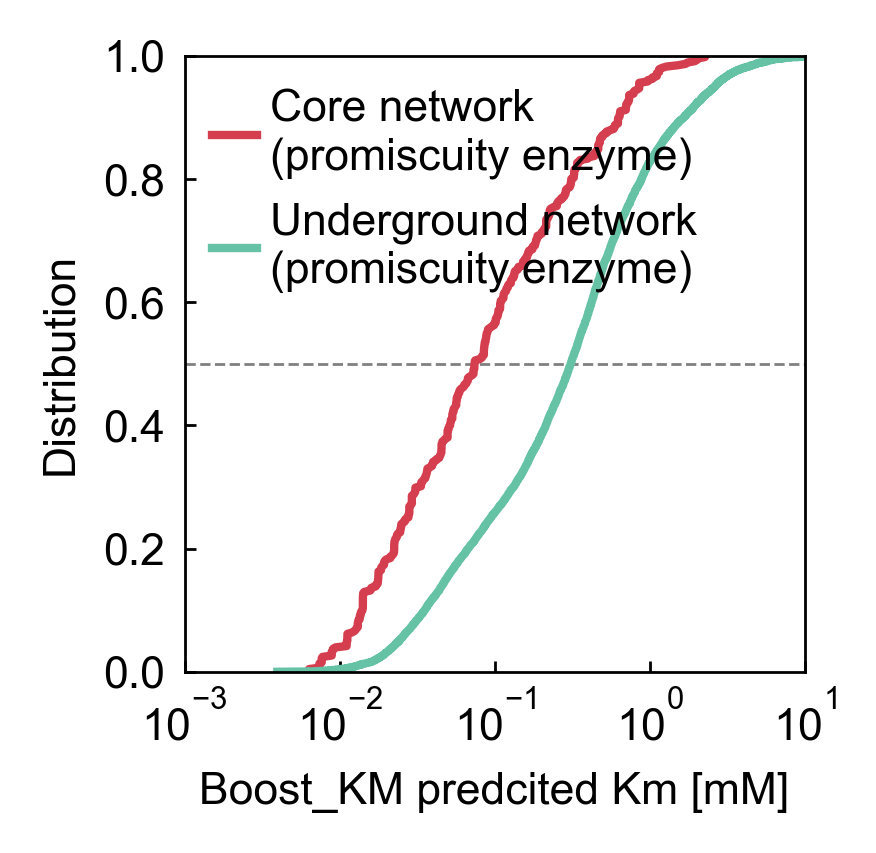

In [24]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
# plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
# plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')

# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)

plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('Boost_KM predcited Km [mM]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.001, 10)
plt.xscale('log')
plt.xticks([0.001, 0.01, 0.1, 1,10])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(km_km_predict_S1_figure, dpi=400, bbox_inches='tight')
plt.show()

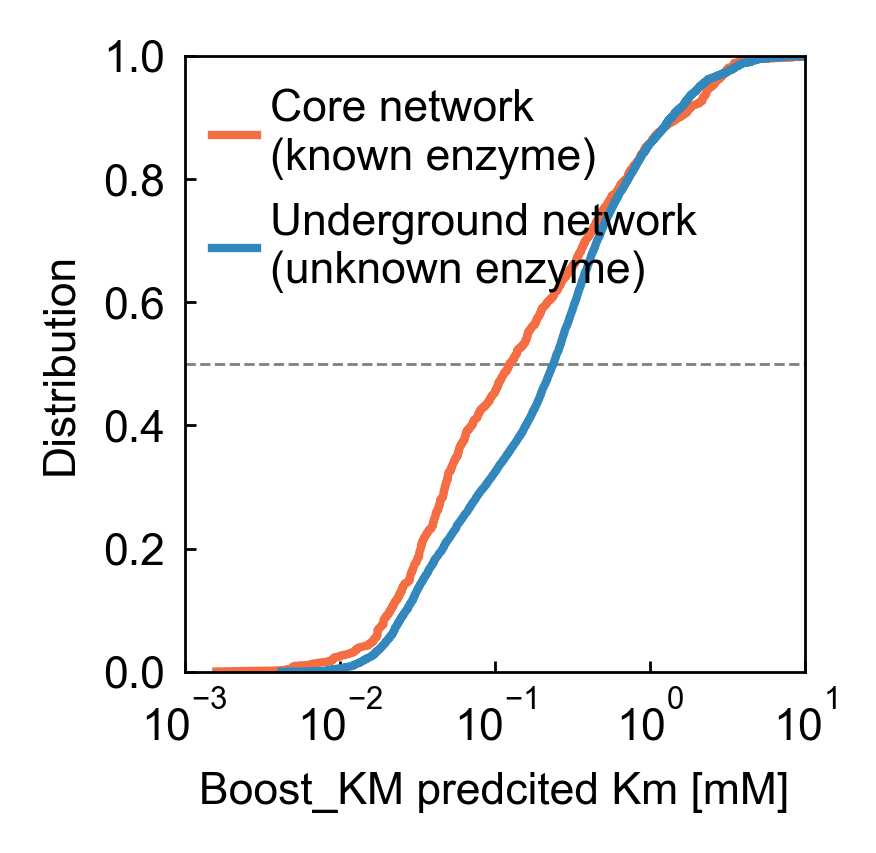

In [25]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
# plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
# plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')

# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)

plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('Boost_KM predcited Km [mM]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.001, 10)
plt.xscale('log')
plt.xticks([0.001, 0.01, 0.1, 1,10])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(km_km_predict_S2_figure, dpi=400, bbox_inches='tight')
plt.show()

# dlkcat_kcat

In [26]:
kcat_pre_df = pd.read_csv(dlkcat_kcat_predict_path,index_col=None)
print(kcat_pre_df.shape)

set1 = set(kcat_pre_df[kcat_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
set2 = set(kcat_pre_df[~kcat_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
list1 =  [x for x in set1 if x not in set2]
list2 =  [x for x in set1 if x  in set2]
list3 =  [x for x in set2 if x not in set1]
kcat_pre_df1 = kcat_pre_df[kcat_pre_df['gene'].isin(list1)]
kcat_pre_df2 = kcat_pre_df[(kcat_pre_df['gene'].isin(list2))&(~kcat_pre_df['rea_id'].str.contains('rxn'))]
kcat_pre_df3 = kcat_pre_df[(kcat_pre_df['gene'].isin(list2))&(kcat_pre_df['rea_id'].str.contains('rxn'))]
kcat_pre_df4 = kcat_pre_df[kcat_pre_df['gene'].isin(list3)]
list1_without_rxn = kcat_pre_df1
list2_without_rxn = kcat_pre_df2
list3_with_rxn = kcat_pre_df3
list4_with_rxn = kcat_pre_df4

data_values_1 = np.sort(list1_without_rxn["kcat"])#median
data_len_1 = len(data_values_1)
data_proportions_1 = np.arange(1, data_len_1 + 1) / data_len_1
data_values_2 = np.sort(list2_without_rxn["kcat"])#median
data_len_2 = len(data_values_2)
data_proportions_2 = np.arange(1, data_len_2 + 1) / data_len_2
data_values_3 = np.sort(list3_with_rxn["kcat"])#median
data_len_3 = len(data_values_3)
data_proportions_3 = np.arange(1, data_len_3 + 1) / data_len_3
data_values_4 = np.sort(list4_with_rxn["kcat"])#median
data_len_4 = len(data_values_4)
data_proportions_4 = np.arange(1, data_len_4 + 1) / data_len_4
median_data_values_1 = np.median(data_values_1)
median_data_values_2 = np.median(data_values_2)
median_data_values_3 = np.median(data_values_3)
median_data_values_4 = np.median(data_values_4)

print("Median in data_values_1:", median_data_values_1)
print("Median in data_values_2:", median_data_values_2)
print("Median in data_values_3:", median_data_values_3)
print("Median in data_values_4:", median_data_values_4)

(214244, 11)
Median in data_values_1: 4.9257
Median in data_values_2: 5.33075
Median in data_values_3: 5.9858
Median in data_values_4: 5.2852


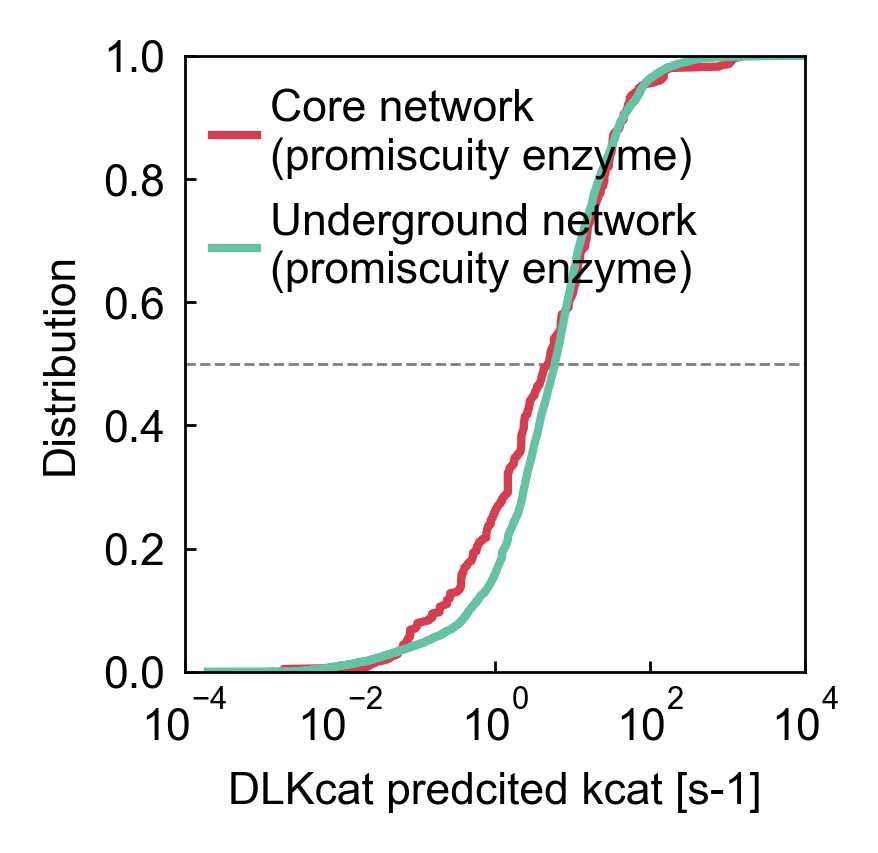

In [27]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
# plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
# plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')
# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('DLKcat predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off() 
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(dlkcat_kcat_predict_S1_figure, dpi=400, bbox_inches='tight')
plt.show()

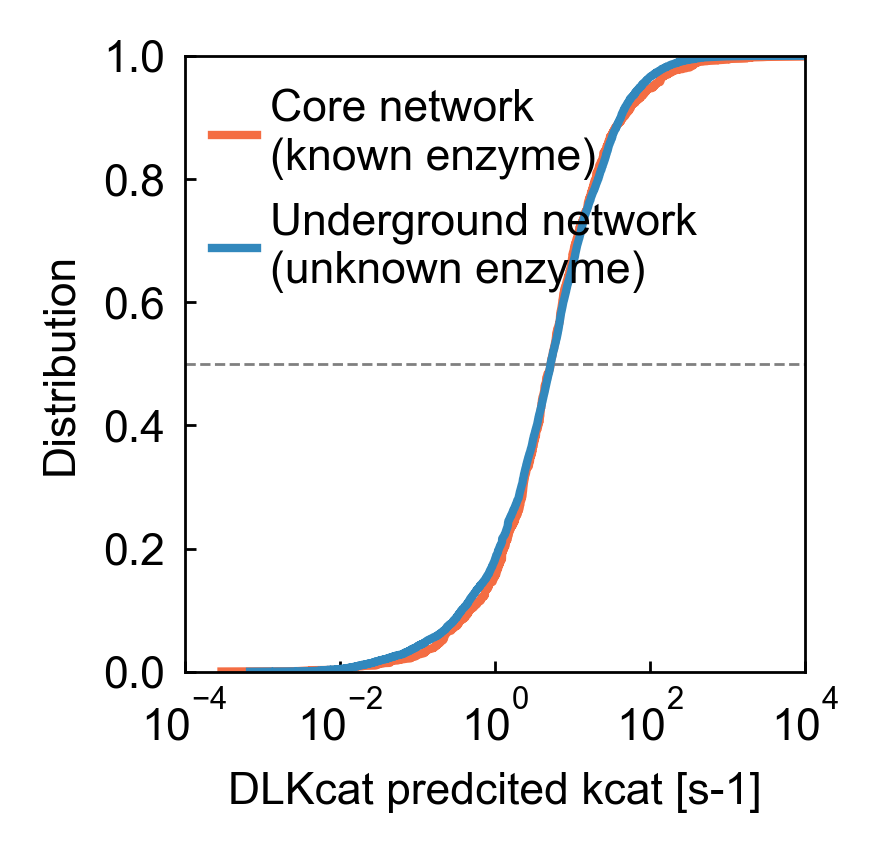

In [28]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
# plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
# plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')
# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('DLKcat predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(dlkcat_kcat_predict_S2_figure, dpi=400, bbox_inches='tight')
plt.show()

# unikp_kcat

In [29]:
kcat_pre_df = pd.read_csv(unikp_kcat_predict_path,index_col=None)
print(kcat_pre_df.shape)

set1 = set(kcat_pre_df[kcat_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
set2 = set(kcat_pre_df[~kcat_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
list1 =  [x for x in set1 if x not in set2]
list2 =  [x for x in set1 if x  in set2]
list3 =  [x for x in set2 if x not in set1]
kcat_pre_df1 = kcat_pre_df[kcat_pre_df['gene'].isin(list1)]
kcat_pre_df2 = kcat_pre_df[(kcat_pre_df['gene'].isin(list2))&(~kcat_pre_df['rea_id'].str.contains('rxn'))]
kcat_pre_df3 = kcat_pre_df[(kcat_pre_df['gene'].isin(list2))&(kcat_pre_df['rea_id'].str.contains('rxn'))]
kcat_pre_df4 = kcat_pre_df[kcat_pre_df['gene'].isin(list3)]
list1_without_rxn = kcat_pre_df1
list2_without_rxn = kcat_pre_df2
list3_with_rxn = kcat_pre_df3
list4_with_rxn = kcat_pre_df4

data_values_1 = np.sort(list1_without_rxn["kcat"])#median
data_len_1 = len(data_values_1)
data_proportions_1 = np.arange(1, data_len_1 + 1) / data_len_1
data_values_2 = np.sort(list2_without_rxn["kcat"])#median
data_len_2 = len(data_values_2)
data_proportions_2 = np.arange(1, data_len_2 + 1) / data_len_2
data_values_3 = np.sort(list3_with_rxn["kcat"])#median
data_len_3 = len(data_values_3)
data_proportions_3 = np.arange(1, data_len_3 + 1) / data_len_3
data_values_4 = np.sort(list4_with_rxn["kcat"])#median
data_len_4 = len(data_values_4)
data_proportions_4 = np.arange(1, data_len_4 + 1) / data_len_4
median_data_values_1 = np.median(data_values_1)
median_data_values_2 = np.median(data_values_2)
median_data_values_3 = np.median(data_values_3)
median_data_values_4 = np.median(data_values_4)

print("Median in data_values_1:", median_data_values_1)
print("Median in data_values_2:", median_data_values_2)
print("Median in data_values_3:", median_data_values_3)
print("Median in data_values_4:", median_data_values_4)

(201634, 14)
Median in data_values_1: 3.8002778427701314
Median in data_values_2: 4.124639524097885
Median in data_values_3: 4.024263651647161
Median in data_values_4: 2.799186570700789


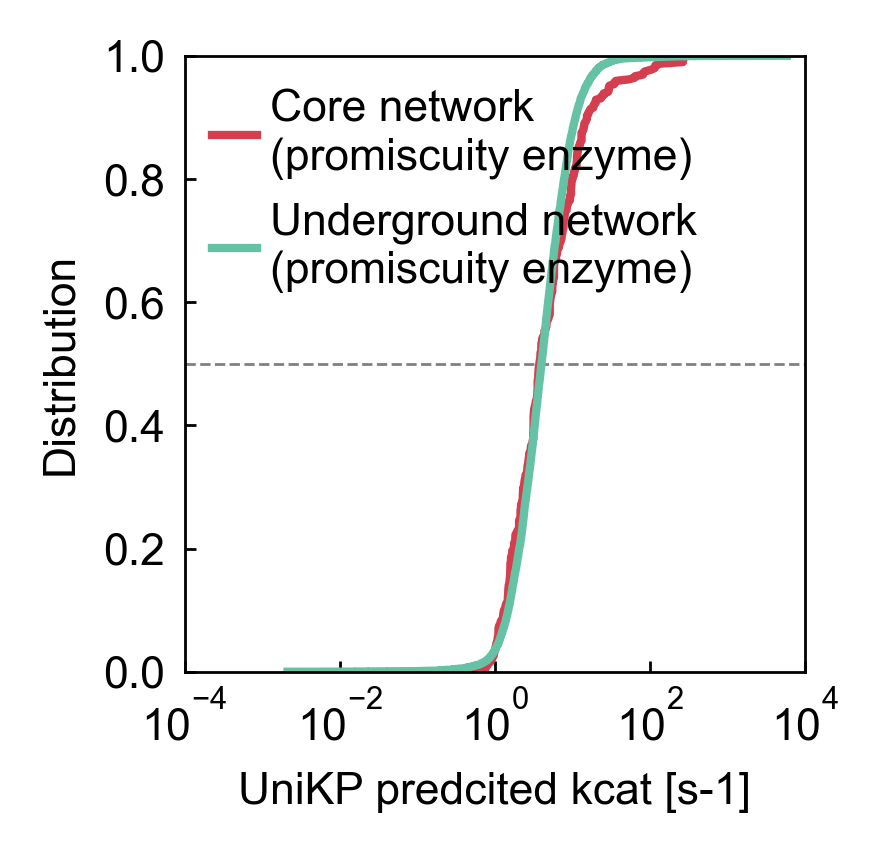

In [30]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
# plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
# plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')
# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('UniKP predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(unikp_kcat_predict_S1_figure, dpi=400, bbox_inches='tight')
plt.show()

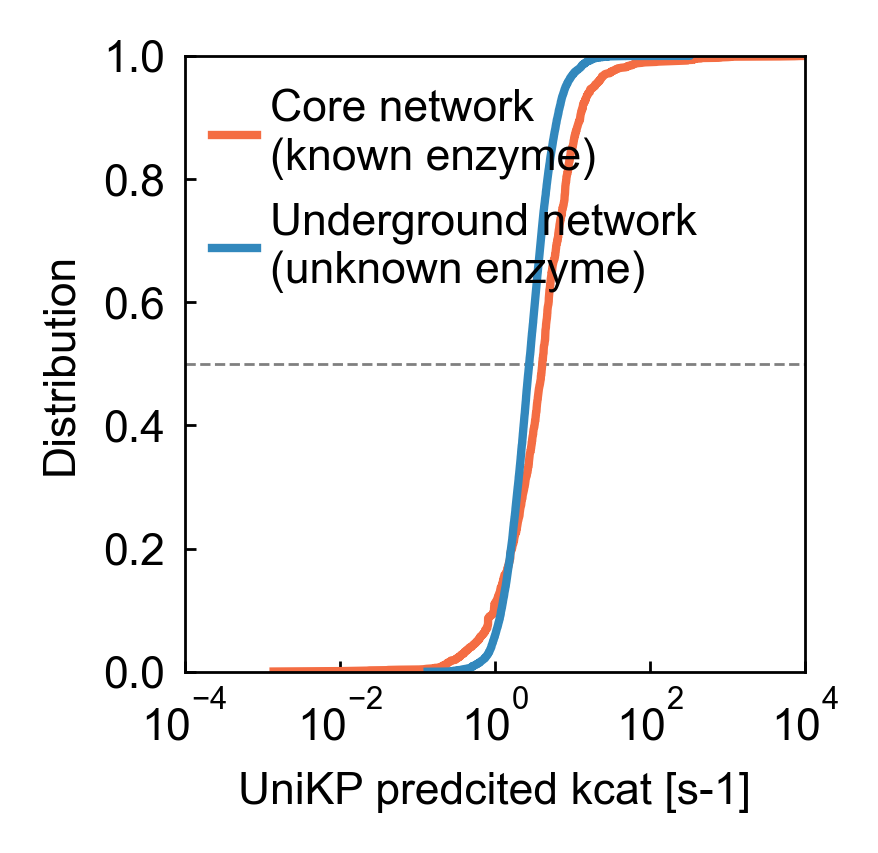

In [31]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
# plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
# plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')
# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('UniKP predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(unikp_kcat_predict_S2_figure, dpi=400, bbox_inches='tight')
plt.show()

# turnup_kcat

In [32]:
kcat_pre_df = pd.read_csv(turnup_kcat_predict_path,index_col=None)
print(kcat_pre_df.shape)

set1 = set(kcat_pre_df[kcat_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
set2 = set(kcat_pre_df[~kcat_pre_df['rea_id'].str.contains('r_')]['gene'].to_list())
list1 =  [x for x in set1 if x not in set2]
list2 =  [x for x in set1 if x  in set2]
list3 =  [x for x in set2 if x not in set1]
kcat_pre_df1 = kcat_pre_df[kcat_pre_df['gene'].isin(list1)]
kcat_pre_df2 = kcat_pre_df[(kcat_pre_df['gene'].isin(list2))&(~kcat_pre_df['rea_id'].str.contains('rxn'))]
kcat_pre_df3 = kcat_pre_df[(kcat_pre_df['gene'].isin(list2))&(kcat_pre_df['rea_id'].str.contains('rxn'))]
kcat_pre_df4 = kcat_pre_df[kcat_pre_df['gene'].isin(list3)]
list1_without_rxn = kcat_pre_df1
list2_without_rxn = kcat_pre_df2
list3_with_rxn = kcat_pre_df3
list4_with_rxn = kcat_pre_df4

data_values_1 = np.sort(list1_without_rxn["kcat"])#median
data_len_1 = len(data_values_1)
data_proportions_1 = np.arange(1, data_len_1 + 1) / data_len_1
data_values_2 = np.sort(list2_without_rxn["kcat"])#median
data_len_2 = len(data_values_2)
data_proportions_2 = np.arange(1, data_len_2 + 1) / data_len_2
data_values_3 = np.sort(list3_with_rxn["kcat"])#median
data_len_3 = len(data_values_3)
data_proportions_3 = np.arange(1, data_len_3 + 1) / data_len_3
data_values_4 = np.sort(list4_with_rxn["kcat"])#median
data_len_4 = len(data_values_4)
data_proportions_4 = np.arange(1, data_len_4 + 1) / data_len_4
median_data_values_1 = np.median(data_values_1)
median_data_values_2 = np.median(data_values_2)
median_data_values_3 = np.median(data_values_3)
median_data_values_4 = np.median(data_values_4)

print("Median in data_values_1:", median_data_values_1)
print("Median in data_values_2:", median_data_values_2)
print("Median in data_values_3:", median_data_values_3)
print("Median in data_values_4:", median_data_values_4)

(126892, 6)
Median in data_values_1: 13.19973
Median in data_values_2: 10.768481
Median in data_values_3: 12.774895
Median in data_values_4: 8.700947


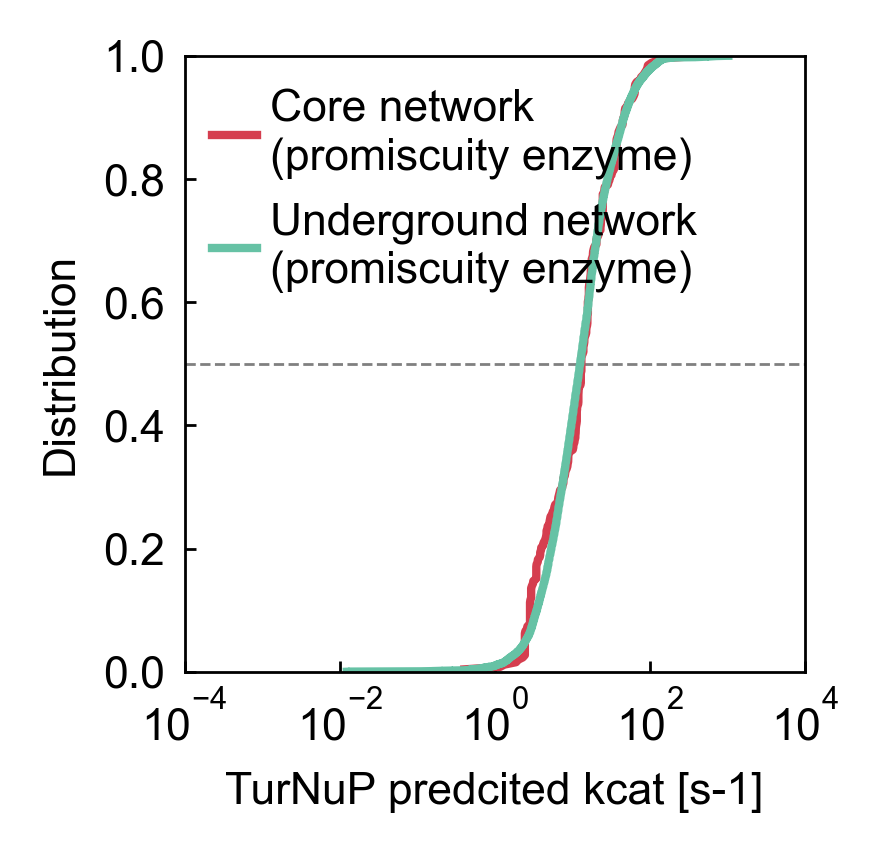

In [33]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
# plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
# plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')
# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('TurNuP predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(turnup_kcat_predict_S1_figure, dpi=400, bbox_inches='tight')
plt.show()

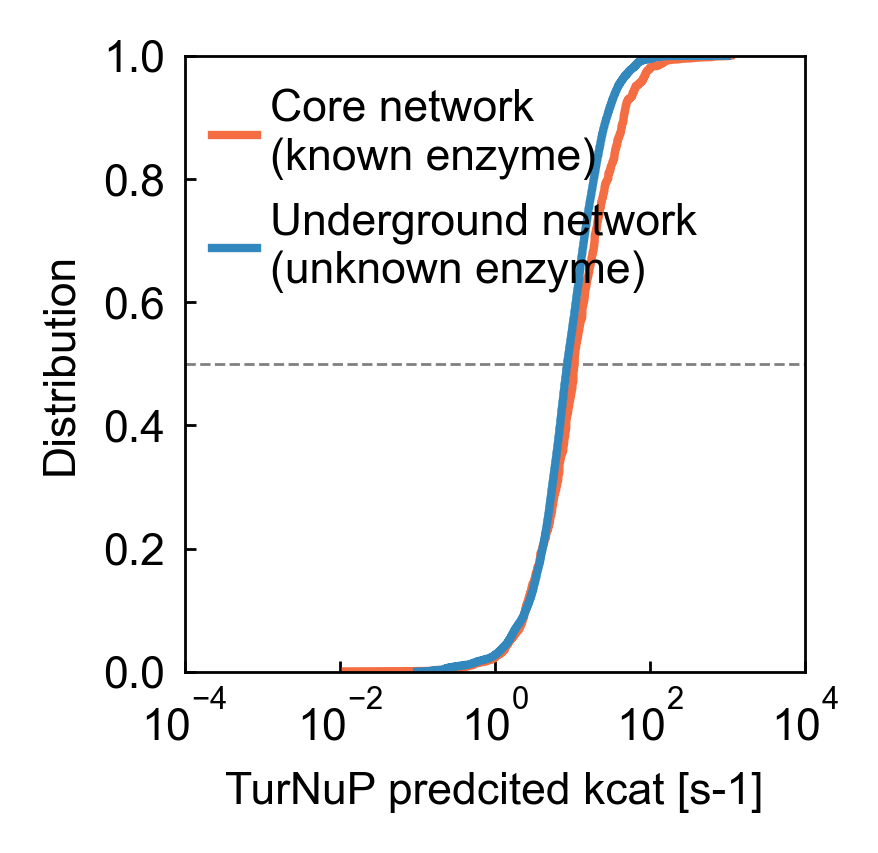

In [34]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
# plt.plot(data_values_1, data_proportions_1, linestyle='-',  color='#d53e4f', label='Core network\n(generalist)')
plt.plot(data_values_2, data_proportions_2, linestyle='-',  color='#f46d43', label='Core network\n(specialist)')
# plt.plot(data_values_3, data_proportions_3, linestyle='-',  color='#66c2a5', label='Underground network\n(generalist)')
plt.plot(data_values_4, data_proportions_4, linestyle='-',  color='#3288bd', label='Underground network\n(newly characterized\nenzymes)')
# plt.plot([median_data_values_1, median_data_values_1], [0.35, 0.5], color='#d53e4f', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_2, median_data_values_2], [0.35, 0.5], color='#f46d43', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_3, median_data_values_3], [0.35, 0.5], color='#66c2a5', linestyle='-', linewidth=0.5)
# plt.plot([median_data_values_4, median_data_values_4], [0.35, 0.5], color='#3288bd', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('TurNuP predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(turnup_kcat_predict_S2_figure, dpi=400, bbox_inches='tight')
plt.show()